## Working with Soil Moisture Dataset

In [1]:
#importing the libraries to be used

############################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cf
import seaborn as sns
import calendar
import warnings
############################################

# from mpl_toolkits.basemap import Basemap
#from metpy.cbook import get_test_data
# from matplotlib import cm
# import matplotlib.ticker as mticker


In [3]:
# import dask

# # Set the option to split large chunks
# with dask.config.set(**{'array.slicing.split_large_chunks': True}):
#     ds = xr.open_mfdataset('era5_data_*.nc', combine='nested', concat_dim='time')
# ds


# # import dask

# # # Set the option to split large chunks
# # with dask.config.set(**{'array.slicing.split_large_chunks': True}):
# #     dq = xr.open_mfdataset('era5_large_*.nc', combine='nested', concat_dim='time')
# # with dask.config.set(**{'array.slicing.split_large_chunks': True}):
# #     dq = dq.sortby('time')
# # dq

In [3]:

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################

#loading the dataset5
soil = xr.open_mfdataset('C3S-SOILMOISTURE-L3S-SSMV-COMBINED-*.nc', combine='nested', concat_dim='time')
soil

<xarray.Dataset>
Dimensions:     (lat: 720, lon: 1440, time: 396)
Coordinates:
  * lat         (lat) float32 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon         (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time        (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
Data variables:
    sm          (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sensor      (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    freqbandID  (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    title:                        C3S Satellite Surface Soil Moisture COMBINE...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    contact:                      cci_sm_contact@eodc.eu
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    platform:                     Nimbus 7, DMSP, TRMM, AQUA, Coriolis, GCOM-...
    processing_level:             Quality-controlled, super-collocated (L3S) ...
    ...                           ...
    id:                           C3S-SOILMOISTURE-L3S-SSMV-COMBINED-MONTHLY-...
    history:                      2023-06-29T14:47:03.094742 mean calculated
    date_created:                 2023-06-29T14:47:03Z
    time_coverage_duration:       P1M
    time_coverage_start:          1990-12-31T12:00:00Z
    time_coverage_end:            1991-01-31T12:00:00Z

## Descriptive Statistics

### Global 

In [7]:

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Select the data and convert it to a NumPy array
sm_data = soil['sm'].sel(time=slice('1991', '2023')).values

# Ensure the data is a NumPy array
if not isinstance(sm_data, np.ndarray):
    sm_data = sm_data.compute() if hasattr(sm_data, 'compute') else np.array(sm_data)

# Remove NaN values from the data
sm_data = sm_data[~np.isnan(sm_data)]

# Compute the mean
sm_mean = np.mean(sm_data)

# Compute the standard deviation
sm_std = np.std(sm_data)

# Compute the maximum
sm_max = np.max(sm_data)

# Compute the minimum
sm_min = np.min(sm_data)

# Compute the 25th percentile
sm_25 = np.percentile(sm_data, 25)

# Compute the 50th percentile
sm_50 = np.percentile(sm_data, 50)

# Compute the 75th percentile
sm_75 = np.percentile(sm_data, 75)

# Print or use the results
print("Mean:", sm_mean)
print("Standard Deviation:", sm_std)
print("Maximum:", sm_max)
print("Minimum:", sm_min)
print("25th Percentile:", sm_25)
print("50th Percentile:", sm_50)
print("75th Percentile:", sm_75)


Mean: 0.20676087
Standard Deviation: 0.08382128
Maximum: 1.0
Minimum: 0.0
25th Percentile: 0.14402078092098236
50th Percentile: 0.21039272099733353
75th Percentile: 0.26808784157037735


### West Africa 

In [8]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Select the data
west_sm_data = soil['sm'].sel(lon=slice(-20, 16), lat=slice(18, -1)).sel(time=slice('1991', '2023')).values

# Ensure the data is a NumPy array
if not isinstance(west_sm_data, np.ndarray):
    west_sm_data = west_sm_data.compute() if hasattr(west_sm_data, 'compute') else np.array(west_sm_data)

# Remove NaN values from the data
west_sm_data = west_sm_data[~np.isnan(west_sm_data)]

# Compute the mean
west_sm_mean = np.mean(west_sm_data)

# Compute the standard deviation
west_sm_std = np.std(west_sm_data)

# Compute the maximum
west_sm_max = np.max(west_sm_data)

# Compute the minimum
west_sm_min = np.min(west_sm_data)

# Compute the 25th percentile
west_sm_25 = np.percentile(west_sm_data, 25)

# Compute the 50th percentile
west_sm_50 = np.percentile(west_sm_data, 50)

# Compute the 75th percentile
west_sm_75 = np.percentile(west_sm_data, 75)

# Print or use the results
print("Mean:", west_sm_mean)
print("Standard Deviation:", west_sm_std)
print("Maximum:", west_sm_max)
print("Minimum:", west_sm_min)
print("25th Percentile:", west_sm_25)
print("50th Percentile:", west_sm_50)
print("75th Percentile:", west_sm_75)


Mean: 0.15680267
Standard Deviation: 0.09647969
Maximum: 0.4596256
Minimum: 0.019999998
25th Percentile: 0.07697140425443649
50th Percentile: 0.13442308455705643
75th Percentile: 0.2467966116964817


## Heatmaps

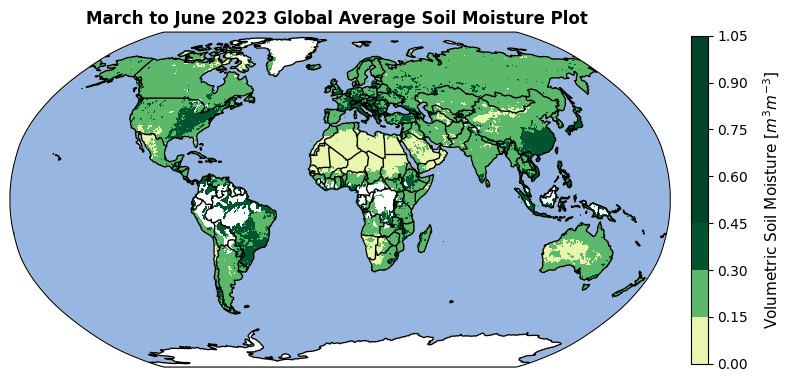

In [7]:

# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2023-03', '2023-06'))

# Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')

def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=0.5)

    # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, 'March to June 2023 Global Average Soil Moisture Plot ')


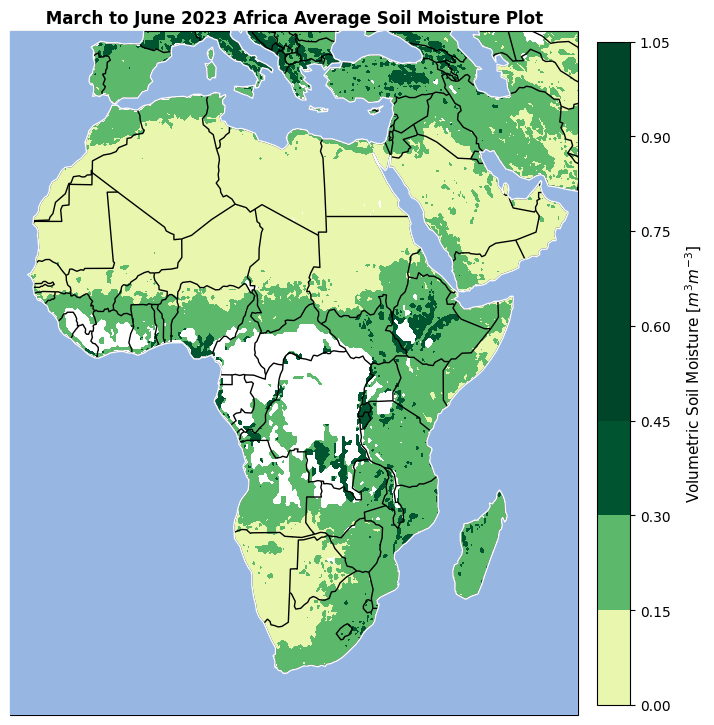

In [8]:
# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2023-03', '2023-06'))

# # Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(8, 10), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,edgecolor='white', zorder=5)
    ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())  # Set extent for Africa
    

     # Add colorbar
    cbar = plt.colorbar(cs, shrink=2, fraction=0.0535, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, ' March to June 2023 Africa Average Soil Moisture Plot ')


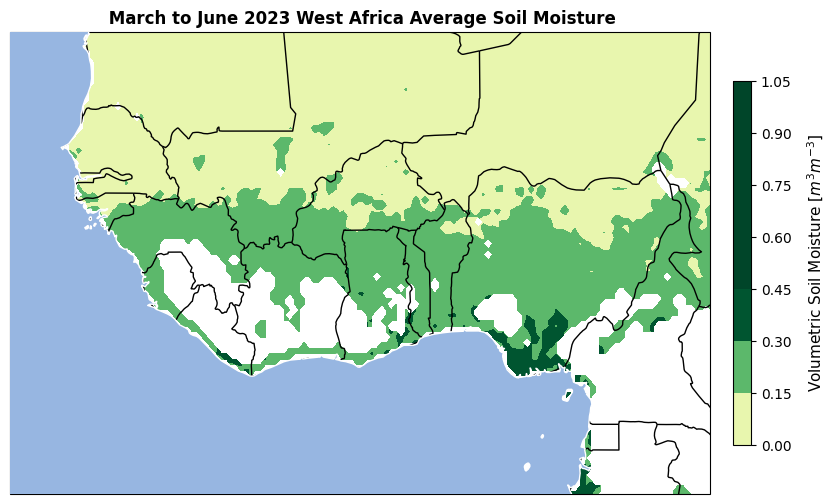

In [9]:
# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2023-03', '2023-06'))

# # Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(10,6), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,edgecolor='white', zorder=5)
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

 # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, ' March to June 2023 West Africa Average Soil Moisture')


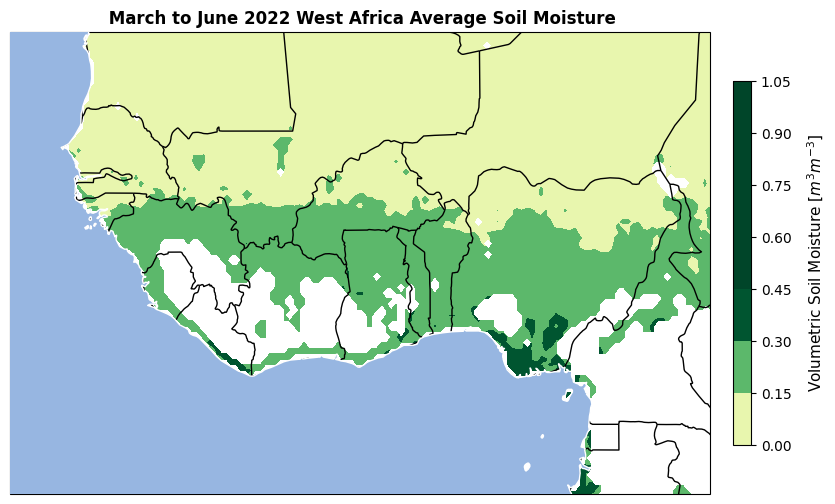

In [11]:
# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2022-03', '2022-06'))

# # Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(10,6), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,edgecolor='white', zorder=5)
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

 # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, ' March to June 2022 West Africa Average Soil Moisture')


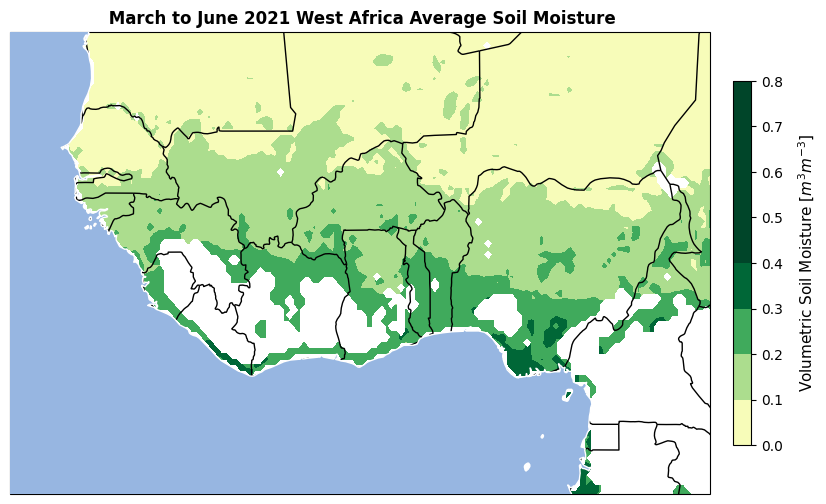

In [12]:
# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2021-03', '2021-06'))

# # Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(10,6), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,edgecolor='white', zorder=5)
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

 # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, ' March to June 2021 West Africa Average Soil Moisture')


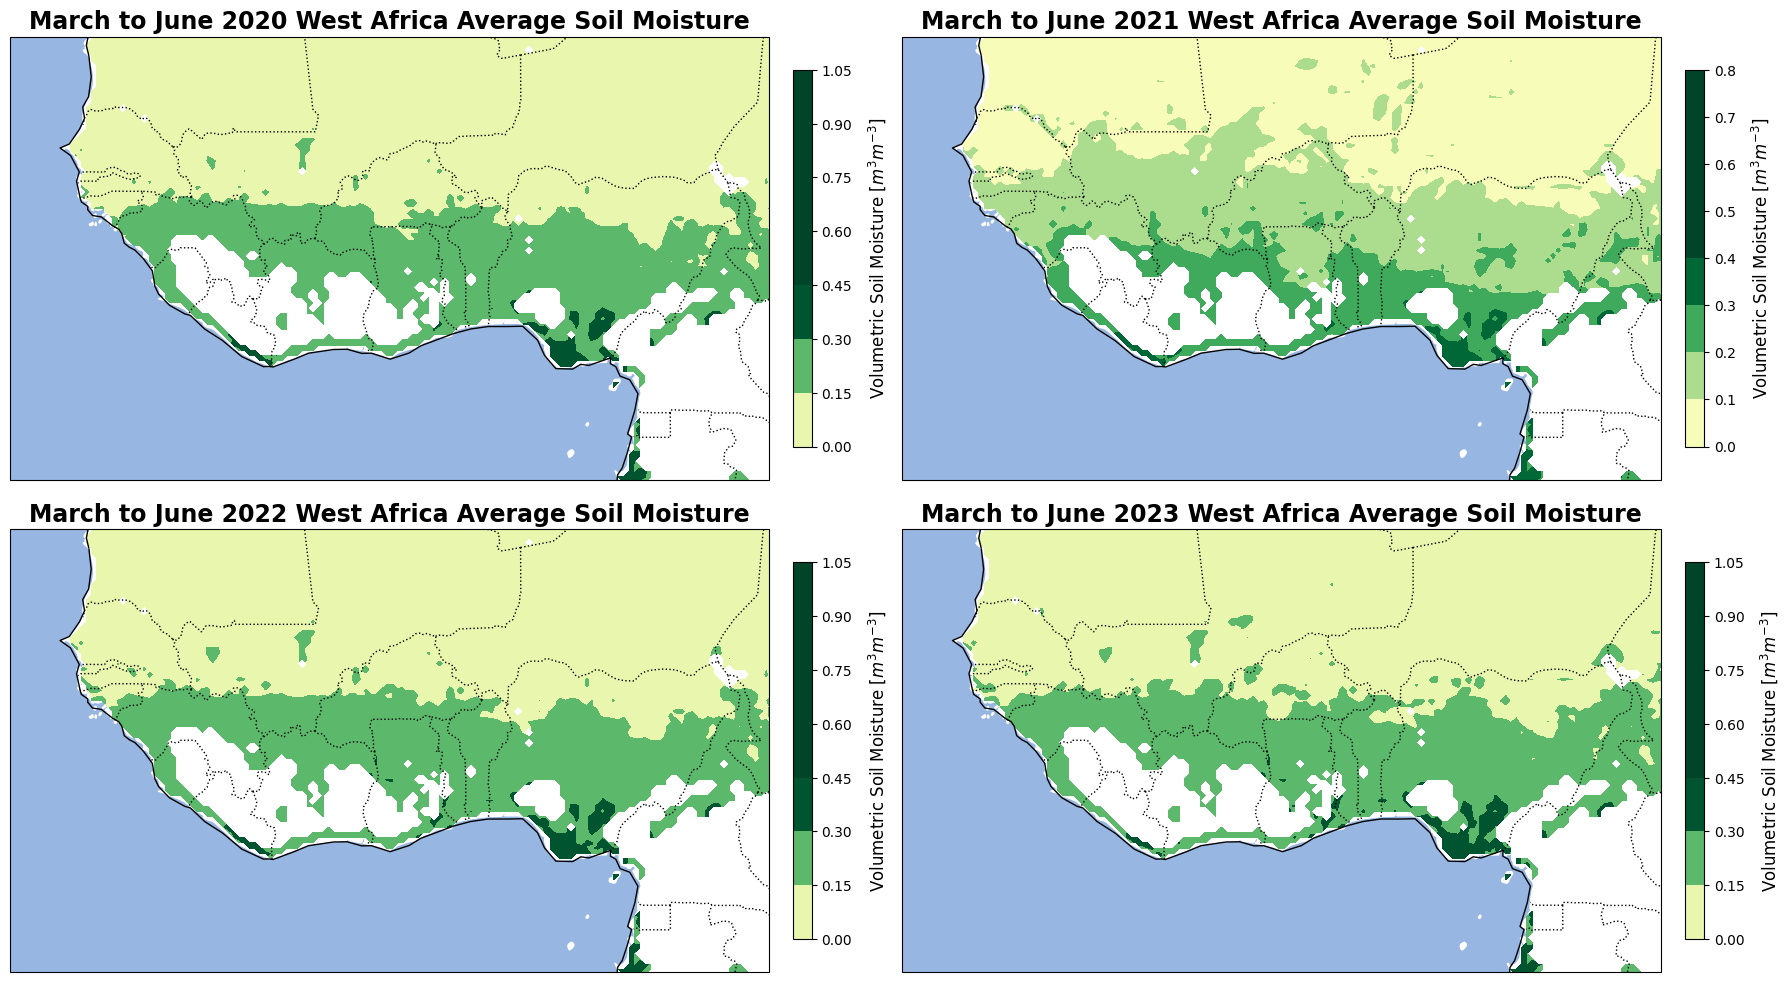

In [13]:
# Global plotting function adjusted for subplot
def global_plot(era5_dataset, ax, title):
    cs = ax.contourf(era5_dataset.lon, 
                     era5_dataset.lat, 
                     era5_dataset,
                     transform=ccrs.PlateCarree(), 
                     vmin = 0,
                     vmax = 0.4,
                     cmap='YlGn')

    ax.add_feature(cf.BORDERS, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=0.5)
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
   
    
    # Adding colorbar and labeling within subplots can clutter the layout, consider adding a single colorbar if necessary
    ax.set_title(title, fontweight='bold', fontsize = '17')
    
    # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)
    
# Setting up a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # Flatten to easily index them

years = ['2020', '2021', '2022', '2023']
for i, year in enumerate(years):
    # Extract and average the soil moisture data for the specified year
    soil_sm = soil['sm'].sel(time=slice(f'{year}-03', f'{year}-06'))
    soil_sm_avg = soil_sm.mean(dim='time')
    
    # Plot using the adjusted global plotting function
    global_plot(soil_sm_avg, axs[i], f'March to June {year} West Africa Average Soil Moisture')
    
     

plt.tight_layout()
plt.show()


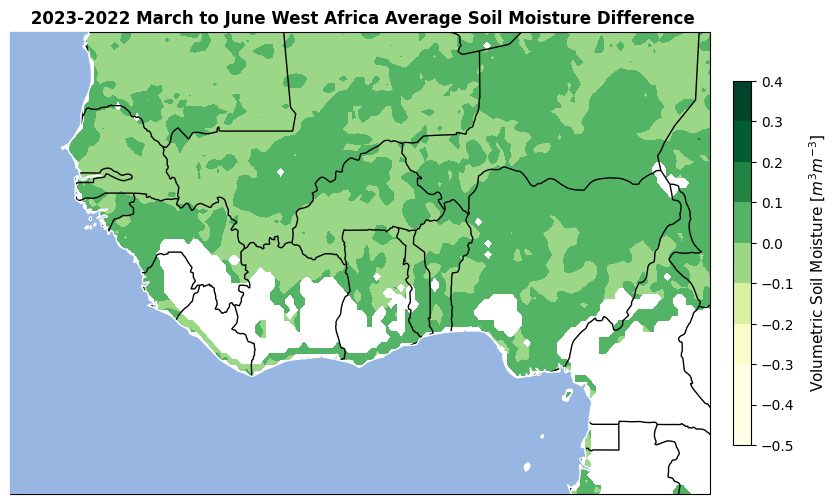

In [14]:
# Extract drought data for the year 2023
soil_sm = soil['sm'].sel(time=slice('2022-03', '2022-06'))

# # Calculate the average sm for the year 2023
soil_sm_avg = soil_sm.mean(dim='time')




# Extract drought data for the year 2023
soil_sm_2022 = soil['sm'].sel(time=slice('2022-03', '2022-06'))
soil_sm_2023 = soil['sm'].sel(time=slice('2023-03', '2023-06'))

#calculate average for each year
soil_sm_2022_avg = soil_sm_2022.mean(dim='time')
soil_sm_2023_avg = soil_sm_2023.mean(dim='time')

#calculate the difference
soil_sm_avg = soil_sm_2023_avg - soil_sm_2022_avg


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(10,6), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.3,
                       vmax = 0.3,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,edgecolor='white', zorder=5)
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

# Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=11, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(soil_sm_avg, ' 2023-2022 March to June West Africa Average Soil Moisture Difference')


### Monthly 2023 West Africa Soil Average Moisture

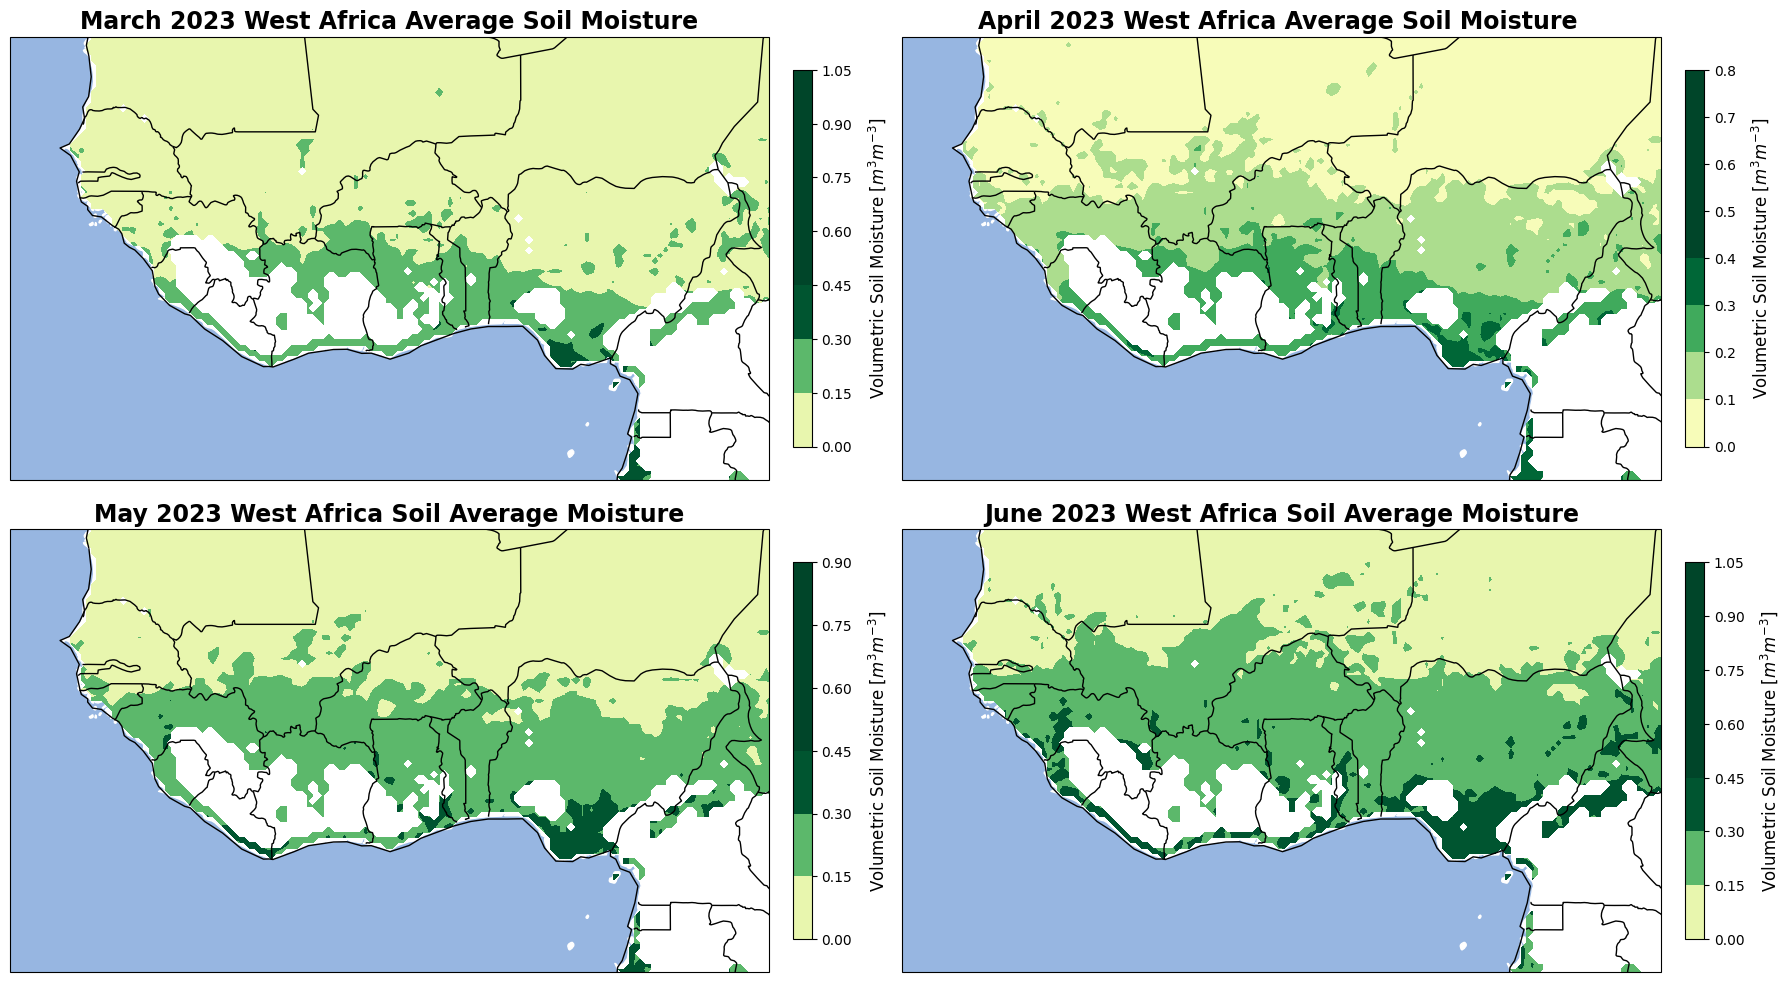

In [15]:
# Define the function Global_plot
def Global_plot(ERA5_dataset, title, ax):
    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=0.5)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
   
    
    # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold', fontsize = '17')

# Create a 2 by 2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Extract drought data for each month in 2023
soil_sm_march = soil['sm'].sel(time='2023-03').mean(dim='time') 
soil_sm_april = soil['sm'].sel(time='2023-04').mean(dim='time') 
soil_sm_may = soil['sm'].sel(time='2023-05').mean(dim='time') 
soil_sm_june = soil['sm'].sel(time='2023-06').mean(dim='time')


# Call the Global_plot function for each month and plot in separate subplots
Global_plot(soil_sm_march, 'March 2023 West Africa Average Soil Moisture', axs[0, 0])
Global_plot(soil_sm_april, 'April 2023 West Africa Average Soil Moisture ', axs[0, 1])
Global_plot(soil_sm_may, 'May 2023 West Africa Soil Average Moisture', axs[1, 0])
Global_plot(soil_sm_june, 'June 2023 West Africa Soil Average Moisture', axs[1, 1])

plt.tight_layout()
plt.show()


### Monthly 2023 West Africa Soil Average Moisture

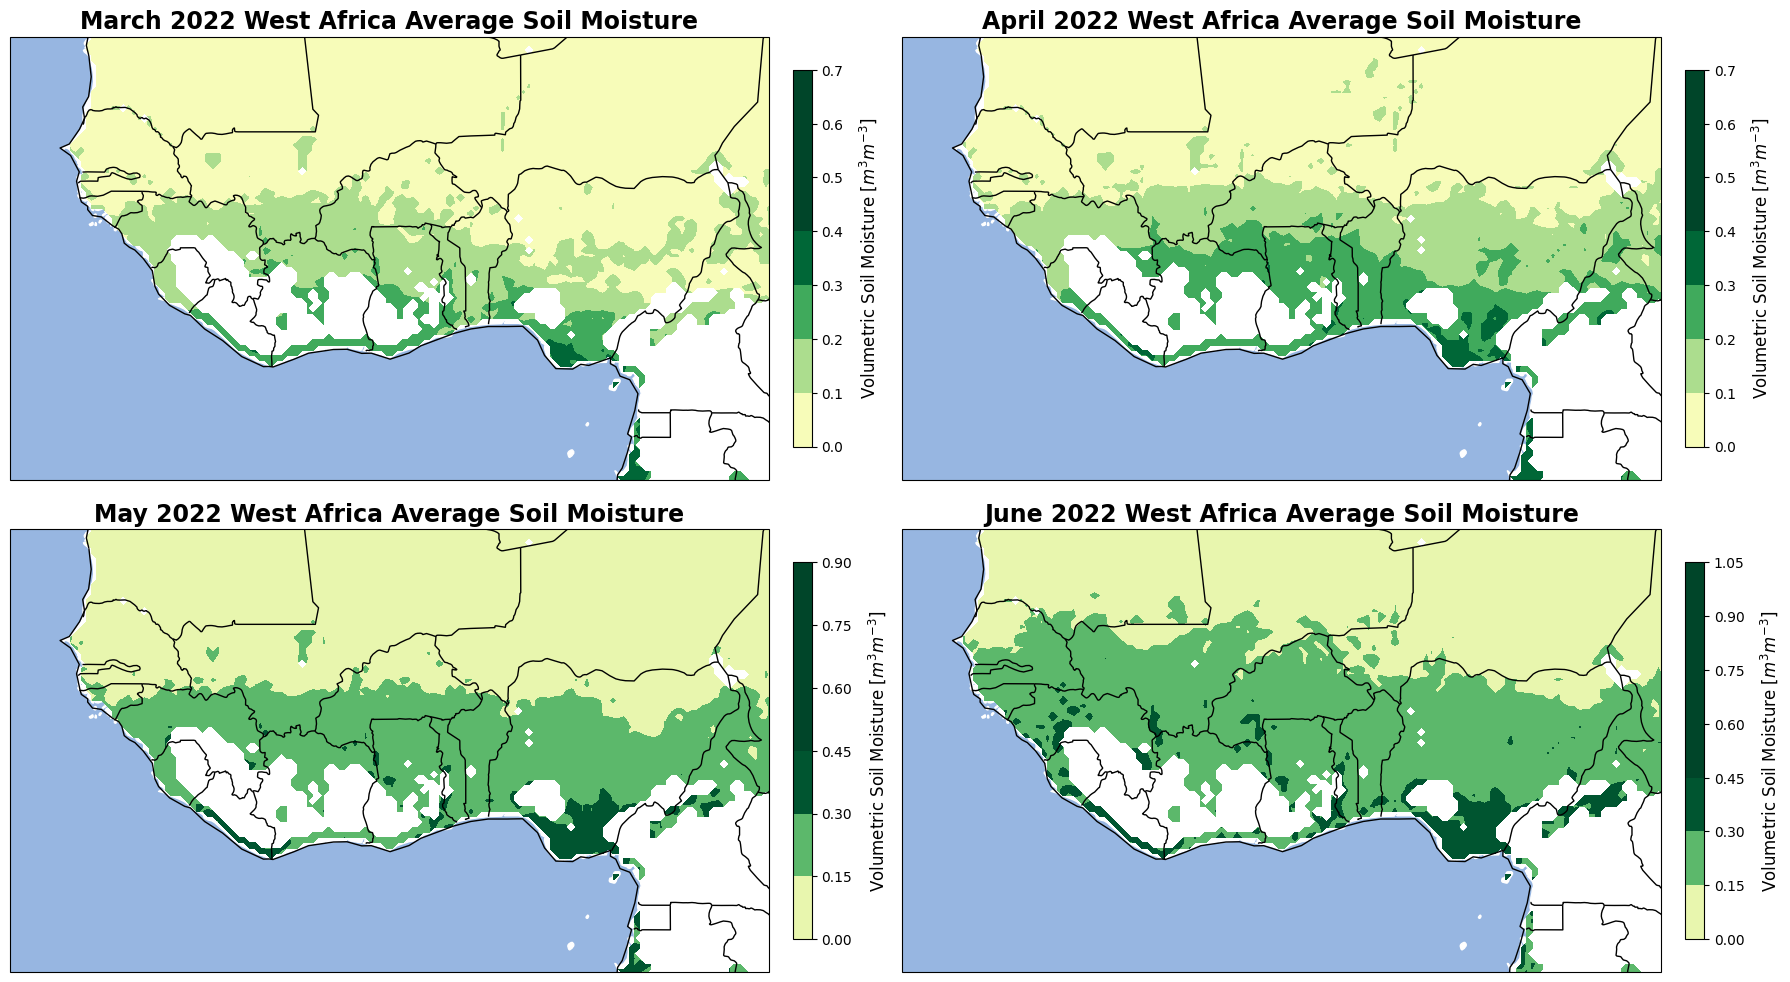

In [16]:
# Define the function Global_plot
def Global_plot(ERA5_dataset, title, ax):
    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = 0,
                       vmax = 0.4,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=0.5)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
   
    
    # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold',fontsize = '17')

# Create a 2 by 2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Extract drought data for each month in 2023
soil_sm_march = soil['sm'].sel(time='2022-03').mean(dim='time') 
soil_sm_april = soil['sm'].sel(time='2022-04').mean(dim='time') 
soil_sm_may = soil['sm'].sel(time='2022-05').mean(dim='time') 
soil_sm_june = soil['sm'].sel(time='2022-06').mean(dim='time')


# Call the Global_plot function for each month and plot in separate subplots
Global_plot(soil_sm_march, 'March 2022 West Africa Average Soil Moisture', axs[0, 0])
Global_plot(soil_sm_april, 'April 2022 West Africa Average Soil Moisture', axs[0, 1])
Global_plot(soil_sm_may, 'May 2022 West Africa Average Soil Moisture', axs[1, 0])
Global_plot(soil_sm_june, 'June 2022 West Africa Average Soil Moisture', axs[1, 1])

plt.tight_layout()
plt.show()


### Monthly West Africa 2022 Soil Moisture Anomaly

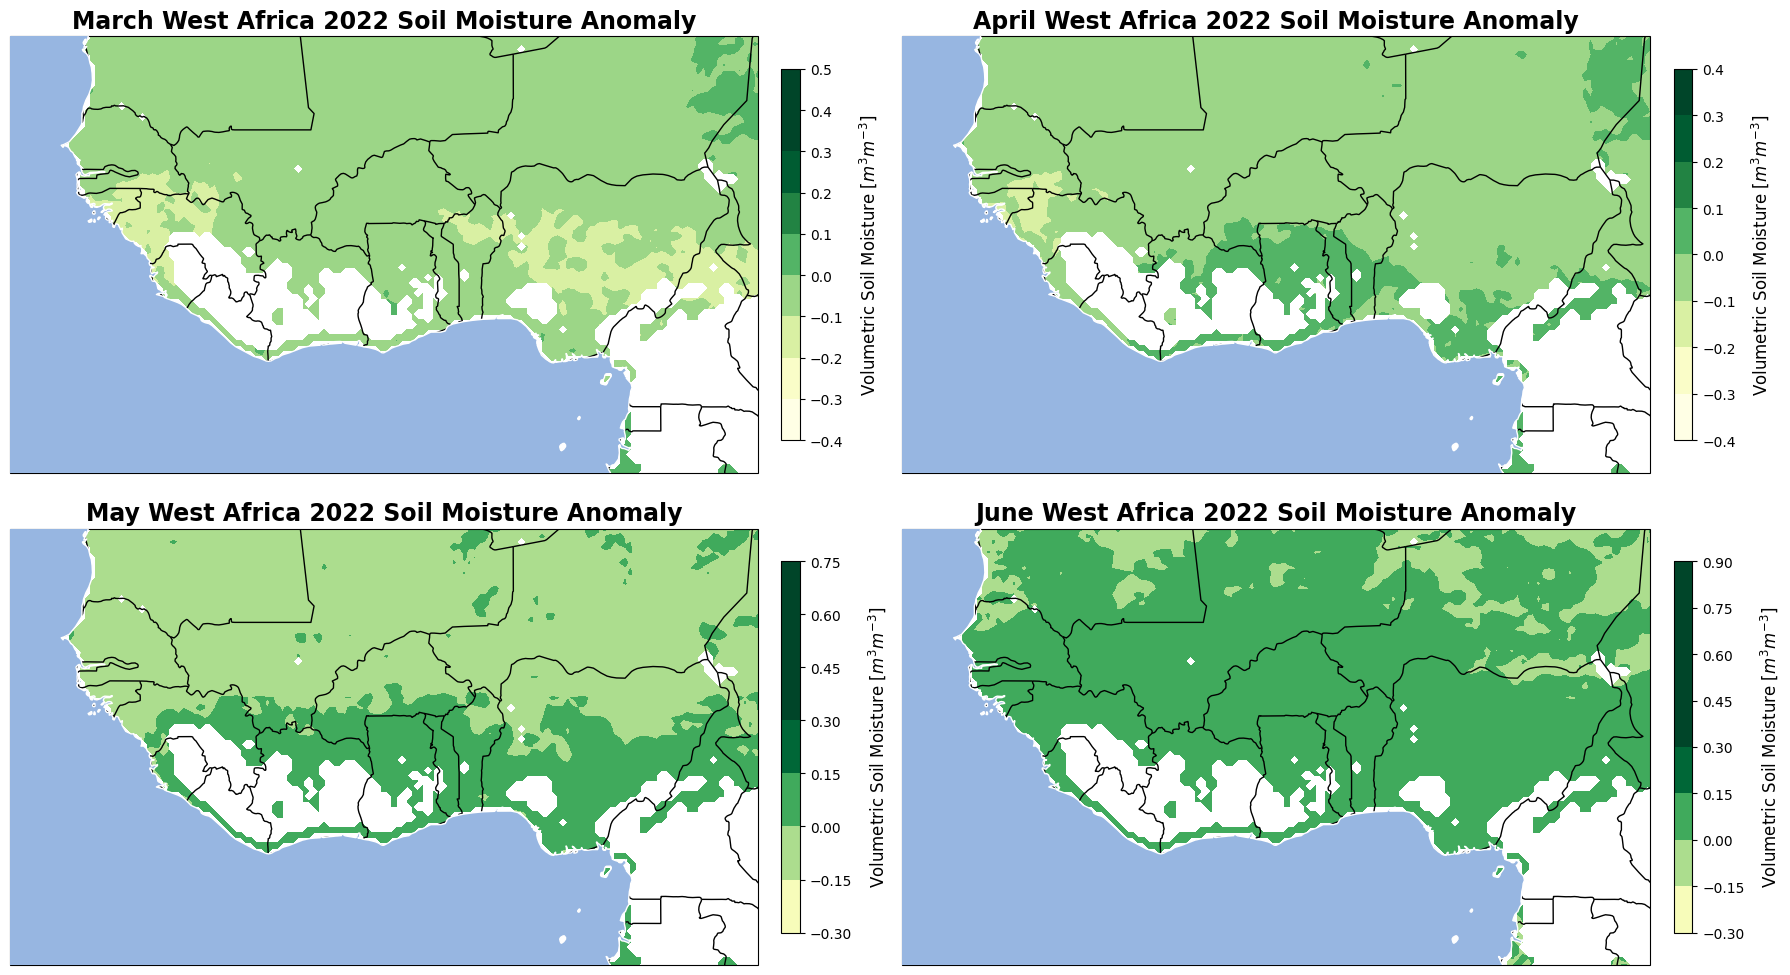

In [17]:
# Define the function Global_plot
def Global_plot(ERA5_dataset, title, ax):
    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = -0.3,
                       vmax = 0.3,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=10)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
   
    
    # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold',fontsize = '17')

# Create a 2 by 2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Extract drought data for each month in 2023
soil_moist_march = soil['sm'].sel(time='2022-03').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_april = soil['sm'].sel(time='2022-04').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_may = soil['sm'].sel(time='2022-05').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_june = soil['sm'].sel(time='2022-06').mean(dim='time')- soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')

# Call the Global_plot function for each month and plot in separate subplots
Global_plot(soil_moist_march, 'March West Africa 2022 Soil Moisture Anomaly', axs[0, 0])
Global_plot(soil_moist_april, 'April West Africa 2022 Soil Moisture Anomaly', axs[0, 1])
Global_plot(soil_moist_may, 'May West Africa 2022 Soil Moisture Anomaly', axs[1, 0])
Global_plot(soil_moist_june, 'June West Africa 2022 Soil Moisture Anomaly', axs[1, 1])

plt.tight_layout()
plt.show()


### Monthly West Africa 2023 Soil Moisture Anomaly

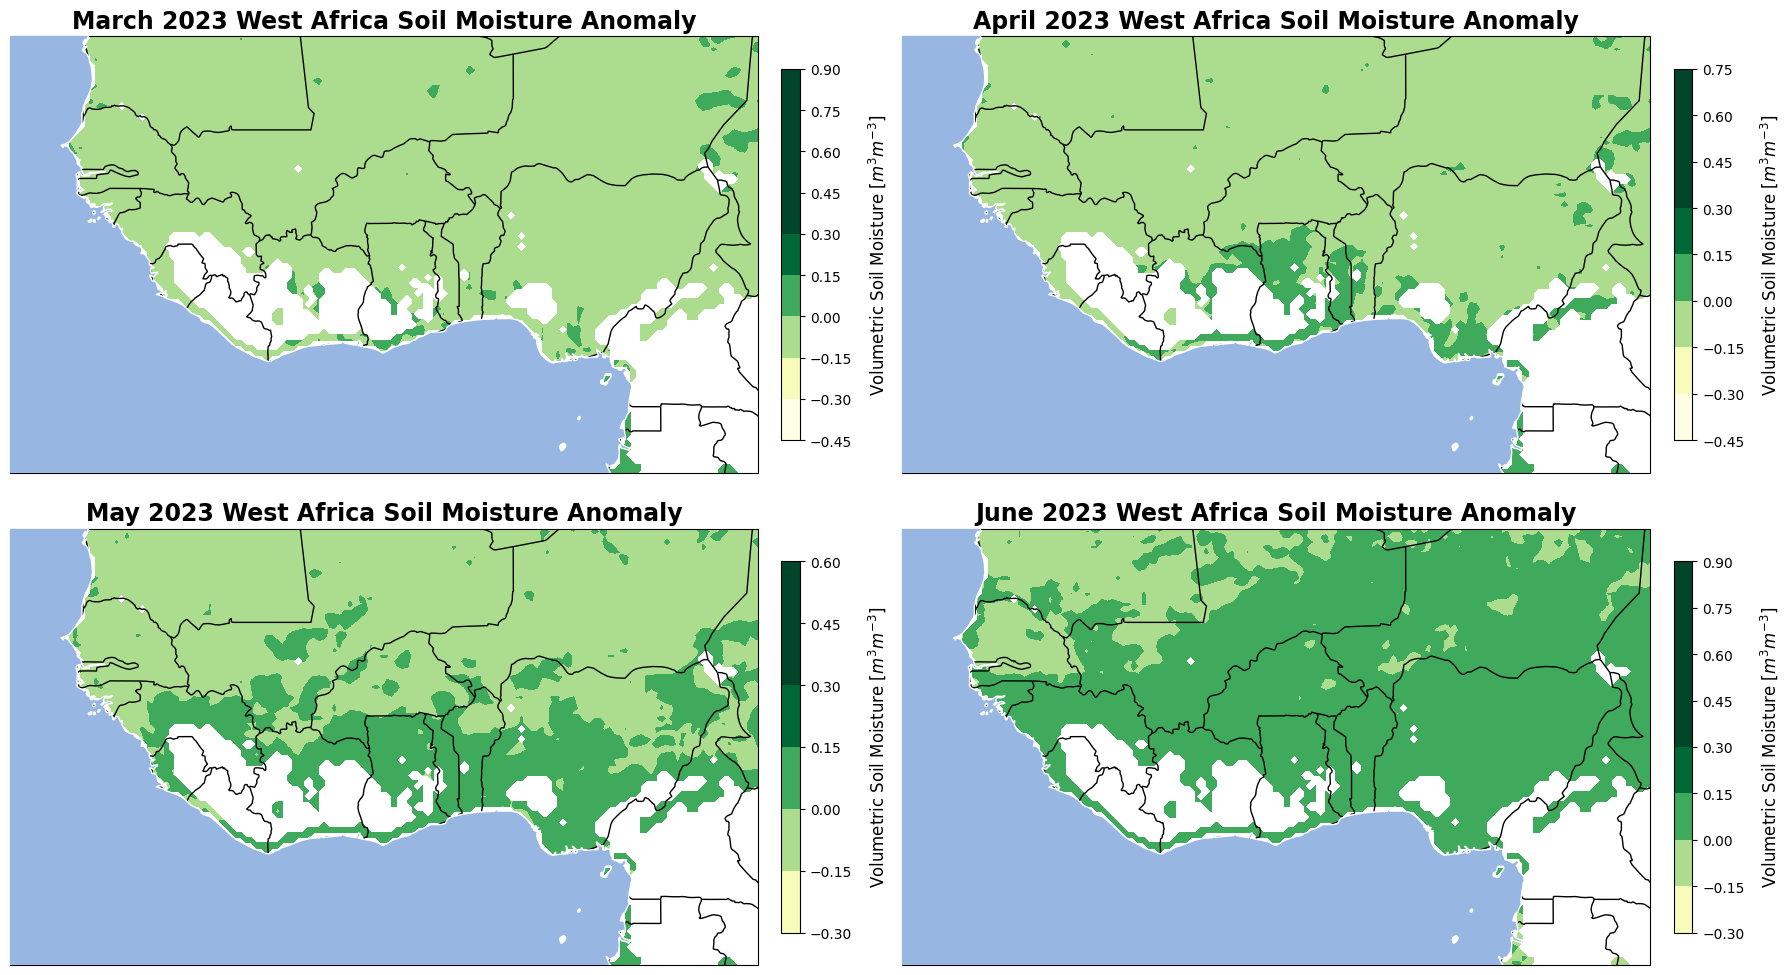

In [18]:
# Define the function Global_plot
def Global_plot(ERA5_dataset, title, ax):
    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = -0.3,
                       vmax = 0.3,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=10)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
   
    
     # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold', fontsize = '17')

# Create a 2 by 2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Extract drought data for each month in 2023
soil_moist_march = soil['sm'].sel(time='2023-03').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_april = soil['sm'].sel(time='2023-04').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_may = soil['sm'].sel(time='2023-05').mean(dim='time') - soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')
soil_moist_june = soil['sm'].sel(time='2023-06').mean(dim='time')- soil['sm'].sel(time=slice('1991', '2020')).mean(dim='time')

# Call the Global_plot function for each month and plot in separate subplots
Global_plot(soil_moist_march, 'March 2023 West Africa Soil Moisture Anomaly', axs[0, 0])
Global_plot(soil_moist_april, 'April 2023 West Africa Soil Moisture Anomaly', axs[0, 1])
Global_plot(soil_moist_may, 'May 2023 West Africa Soil Moisture Anomaly', axs[1, 0])
Global_plot(soil_moist_june, 'June 2023 West Africa Soil Moisture Anomaly', axs[1, 1])

plt.tight_layout()
plt.show()


### Monthly 2023-2022 West Africa Soil Moisture Difference

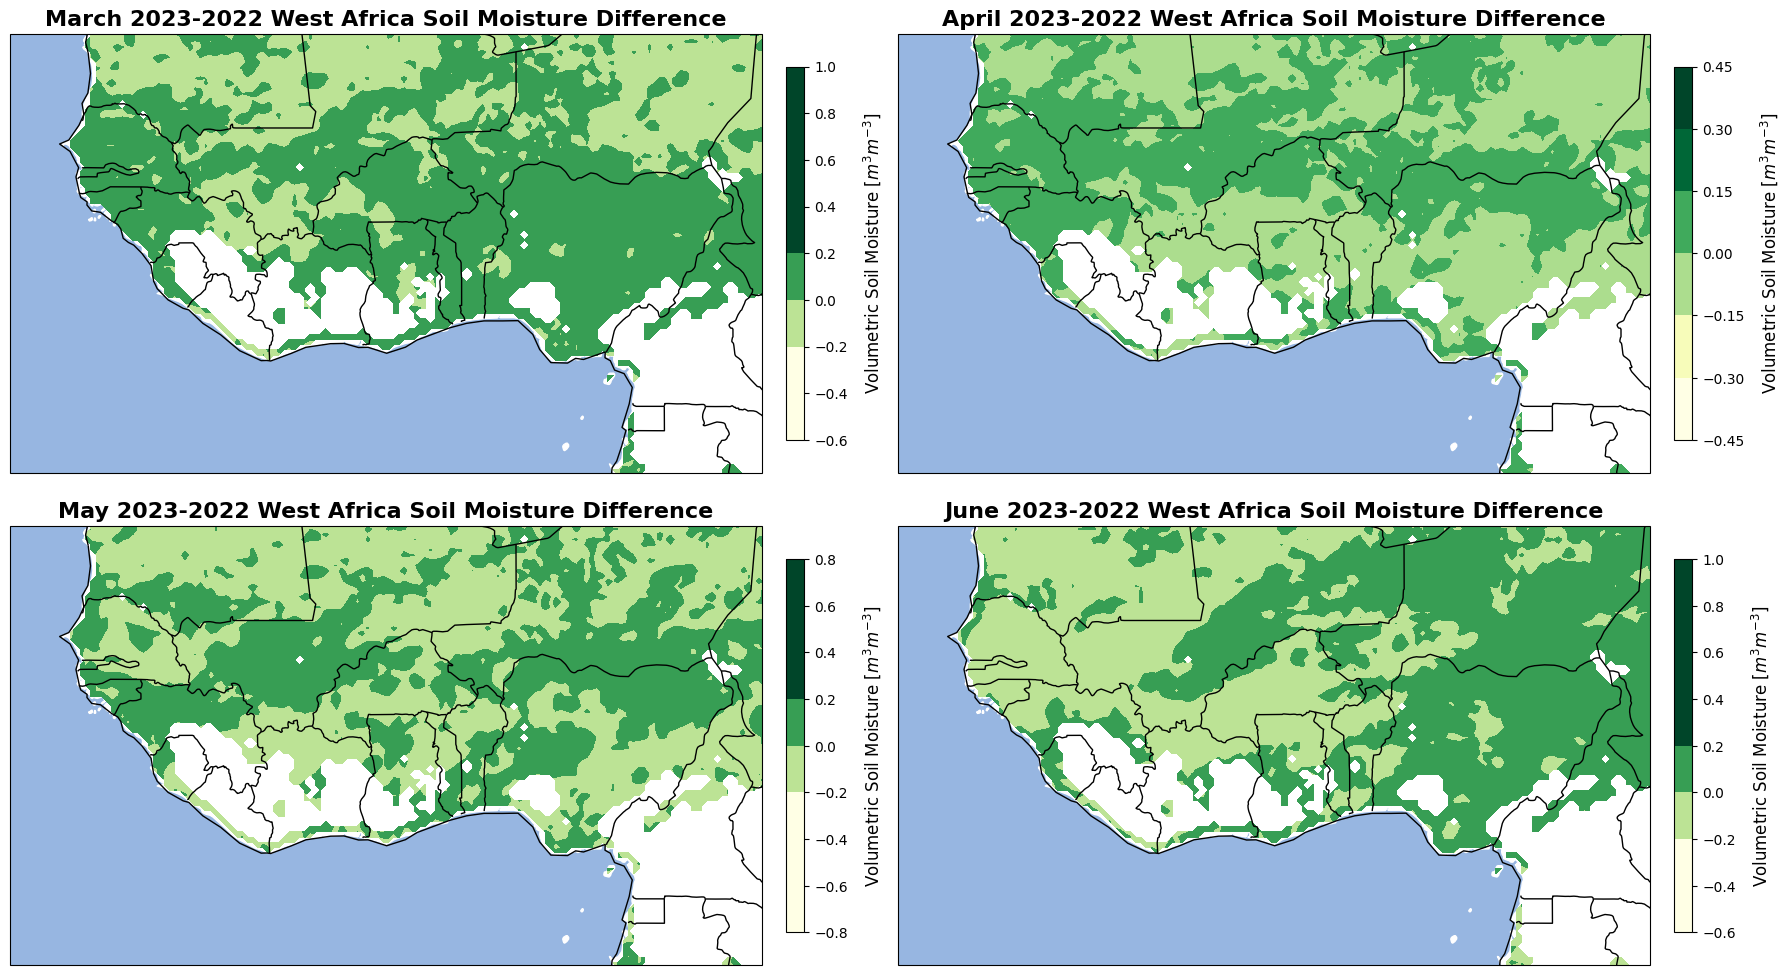

In [21]:
# Define the function Global_plot
def Global_plot(ERA5_dataset, title, ax):
    cs = ax.contourf(ERA5_dataset.lon, 
                       ERA5_dataset.lat, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = -0.3,
                       vmax = 0.3,
                       cmap='YlGn')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='white', zorder=0.5)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
   
    
   # Add colorbar
    cbar = plt.colorbar(cs, shrink=1.0, fraction=0.0235, pad=0.03, orientation='vertical')
    cbar.set_label(label='Volumetric Soil Moisture [$m^3m^{-3}$]', fontsize=12, labelpad=10, rotation = 90)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold', fontsize = '16')

# Create a 2 by 2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Extract drought data for each month in 2023
soil_sm_march = soil['sm'].sel(time='2023-03').mean(dim='time') - soil['sm'].sel(time='2022-03').mean(dim='time') 
soil_sm_april = soil['sm'].sel(time='2023-04').mean(dim='time') -  soil['sm'].sel(time='2022-04').mean(dim='time') 
soil_sm_may = soil['sm'].sel(time='2023-05').mean(dim='time') - soil['sm'].sel(time='2022-05').mean(dim='time') 
soil_sm_june = soil['sm'].sel(time='2023-06').mean(dim='time') - soil['sm'].sel(time='2022-06').mean(dim='time')


# Call the Global_plot function for each month and plot in separate subplots
Global_plot(soil_sm_march, 'March 2023-2022 West Africa Soil Moisture Difference', axs[0, 0])
Global_plot(soil_sm_april, 'April 2023-2022 West Africa Soil Moisture Difference', axs[0, 1])
Global_plot(soil_sm_may, 'May 2023-2022 West Africa Soil Moisture Difference', axs[1, 0])
Global_plot(soil_sm_june, 'June 2023-2022 West Africa Soil Moisture Difference', axs[1, 1])

plt.tight_layout()
plt.show()


## West Africa Time Series Analysis

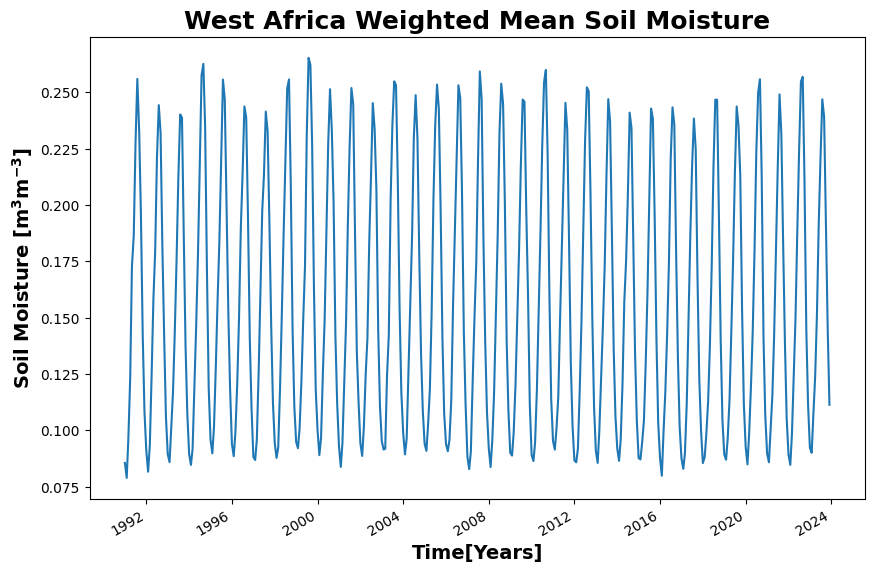

In [10]:
west_africa_sm = soil.sel(lon = slice(-20, 16), lat = slice(18, -1))

# Calculate weights
weights = np.cos(np.deg2rad(west_africa_sm['sm'].lat))
weights.name = "weights"

# Apply weights to the dataset
sm_weighted = west_africa_sm['sm'].weighted(weights)

# Calculate the weighted mean
sm_mean1 = sm_weighted.mean(["lon", "lat"])

# Plot the mean using a line plot
plt.figure(figsize=(10, 6))
sm_mean1.plot()
plt.title('West Africa Weighted Mean Soil Moisture', fontweight='bold', fontsize = '18')
plt.xlabel('Time[Years]', fontweight='bold', fontsize = '14')
plt.ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize = '14')
plt.show()

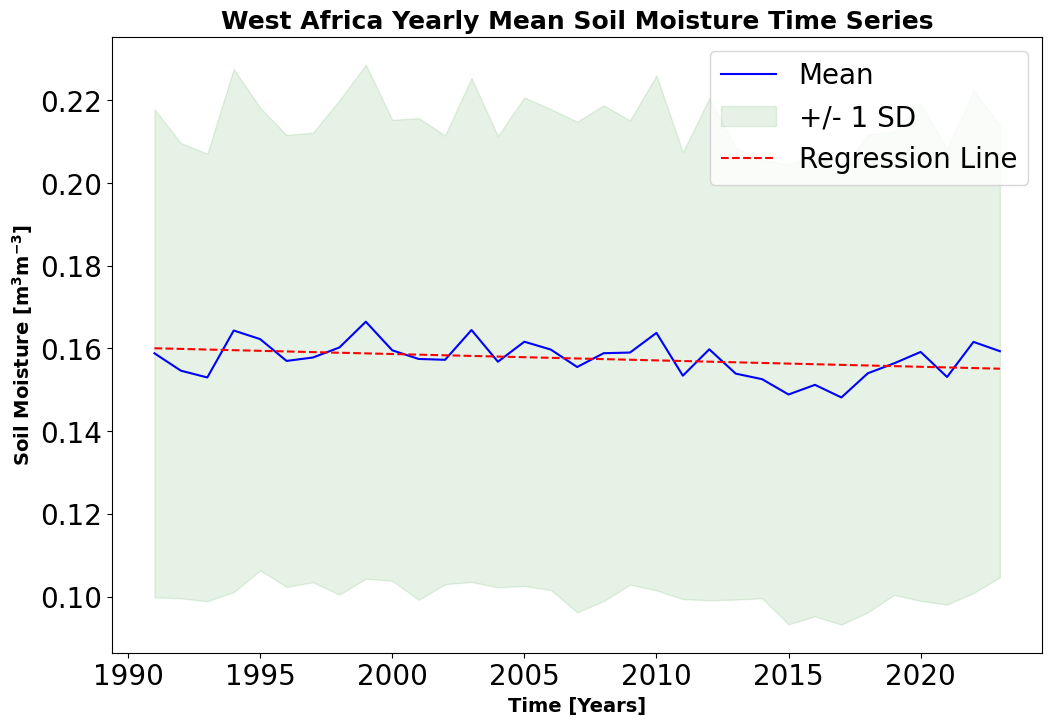

In [24]:
# Calculate yearly mean
sm_yearly1 = sm_mean1.groupby('time.year').mean()

# Calculate standard deviation
std1 = sm_mean1.groupby('time.year').std()

# Prepare data for regression
# Extract years as integer for regression calculation
years = sm_yearly1.year.values
soil_moisture_values = sm_yearly1.values

# Fit a linear regression model
slope, intercept = np.polyfit(years, soil_moisture_values, 1)
# Generate y values based on the slope and intercept
regression_line = slope * years + intercept

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Mean soil moisture plot
ax.plot(sm_yearly1.year, sm_yearly1, color='blue', label='Mean')

# Standard deviation shading
ax.fill_between(sm_yearly1.year, (sm_yearly1 + std1), (sm_yearly1 - std1), alpha=0.1, color='green', label='+/- 1 SD')

# Add regression line
ax.plot(years, regression_line, color='red', linestyle='--', label='Regression Line')

# Plot formatting
plt.title('West Africa Yearly Mean Soil Moisture Time Series', fontweight='bold', fontsize = '18')
plt.ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize = '14')
plt.xlabel('Time [Years]', fontweight='bold', fontsize = '14')
plt.legend()

plt.show()


## Bar chart to visualize the time series of anomalies

Text(0, 0.5, 'Soil Moisture [$\\mathbf{m^3m^{-3}}$]')

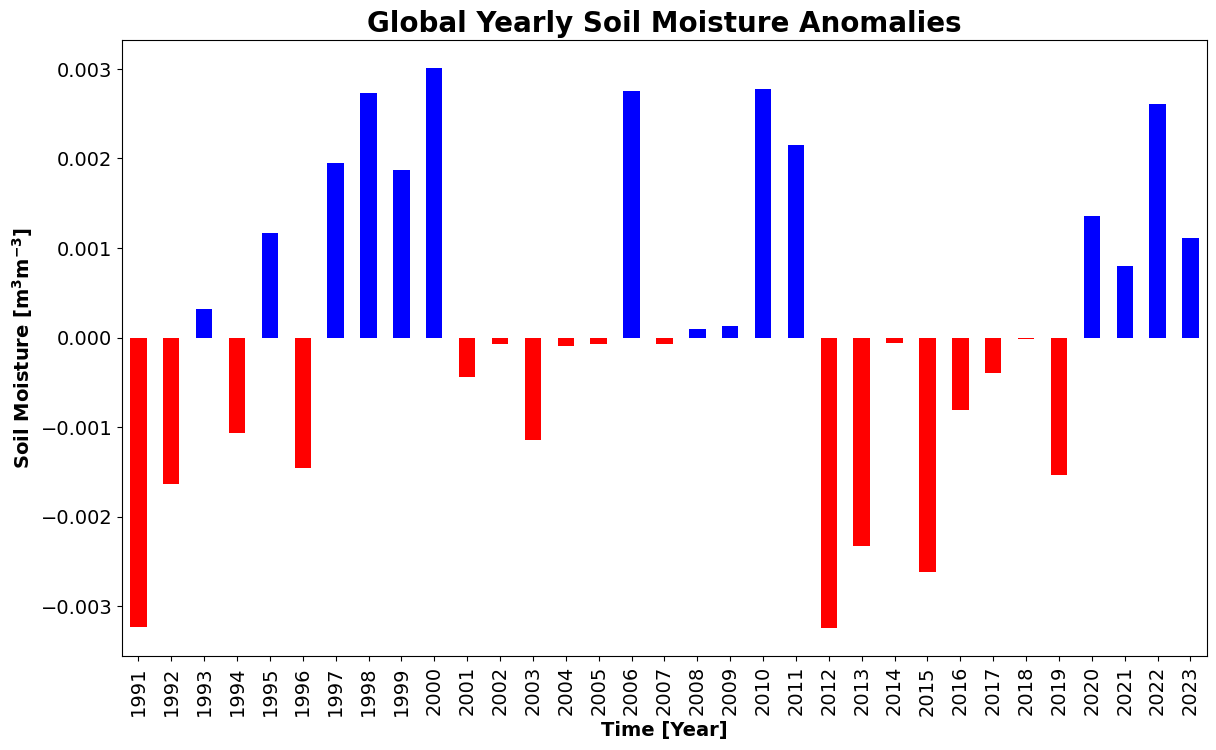

In [21]:
west_africa_sm = soil

# Calculate weights
weights = np.cos(np.deg2rad(west_africa_sm['sm'].lat))
weights.name = "weights"

# Apply weights to the dataset
sm_weighted = west_africa_sm['sm'].weighted(weights)

# Calculate the weighted mean
sm_mean = sm_weighted.mean(["lon", "lat"])


# Calculate yearly mean
sm_yearly = sm_mean.groupby('time.year').mean()

sm_subset = sm_yearly.where((sm_yearly.year > 1990) & (sm_yearly.year < 2021), drop=True)
sm_clim = sm_subset.mean()
sm_anom = sm_yearly - sm_clim

df = sm_anom.to_dataframe()
df['positive'] = df['sm'] > 0
df.tail() # show only first five rows



plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['sm'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'blue', False: 'red'}),
    fontsize=14
)

# Set the title 
ax.set_title('Global Yearly Soil Moisture Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize=14)
ax.set_ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize=14)
#plt.savefig(f'{DATADIR}Arctic_t2m_anom_bar.png') #(reference period 1991-2020)


## Bar chart to visualize the time series of anomalies

In [25]:
sm_subset = sm_yearly1.where((sm_yearly1.year > 1990) & (sm_yearly1.year < 2021), drop=True)
sm_clim = sm_subset.mean()
sm_anom = sm_yearly1 - sm_clim

df = sm_anom.to_dataframe()
df['positive'] = df['sm'] > 0
df.tail() # show only first five rows


sm  positive
year                    
2019 -0.001122     False
2020  0.001620      True
2021 -0.004433     False
2022  0.004051      True
2023  0.001800      True

Text(0, 0.5, 'Soil Moisture [$\\mathbf{m^3m^{-3}}$]')

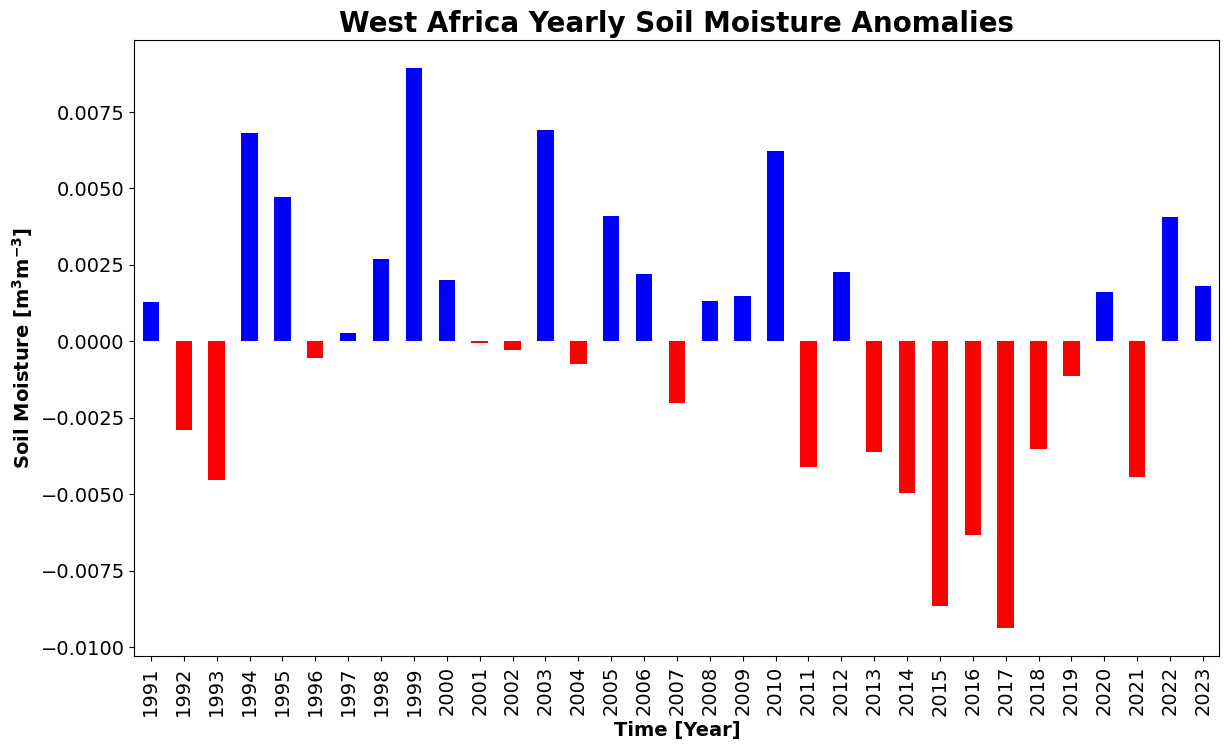

In [26]:
plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['sm'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'blue', False: 'red'}),
    fontsize=14
)

# Set the title 
ax.set_title('West Africa Yearly Soil Moisture Anomalies', fontweight='bold', fontsize="20")

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize=14)
ax.set_ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize=14)
#plt.savefig(f'{DATADIR}Arctic_t2m_anom_bar.png') #(reference period 1991-2020)

## Global Rolling Mean Time Series

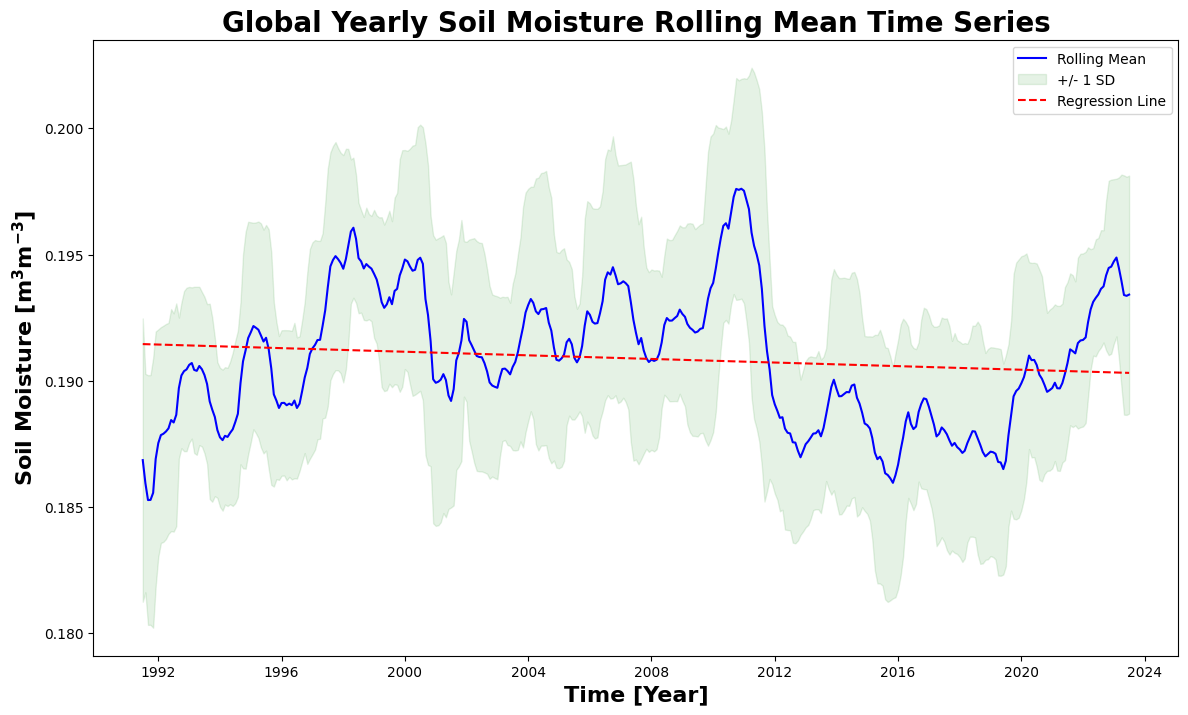

In [5]:

# The dataset
sm = soil.sel(time=slice('1990-01-01', '2023-12-01'))
west_sm = sm

# Calculate normalized weights
_, lat_field = np.meshgrid(west_sm.lon.values, west_sm.lat.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_sm.sm)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the soil moisture
west_sm['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_sm.lat.values, west_sm.lon.values], dims=['lat', 'lon'])
west_sm['sm_norma'] = west_sm.sm * west_sm.weight_normalized

# Calculate the global values
west_sm_m = west_sm.sm_norma.sum(dim=['lat', 'lon'])

# Calculate the 12-month rolling mean
west_sm_mean_rolling = west_sm_m.rolling(time=12, center=True).mean().dropna('time')

# Calculate standard deviation
std_rr = west_sm_m.rolling(time=12, center=True).std().dropna('time')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(west_sm_mean_rolling.time, west_sm_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_sm_mean_rolling.time, (west_sm_mean_rolling + std_rr), (west_sm_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array([np.datetime64(t).astype(float) for t in west_sm_mean_rolling.time.values])  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_sm_mean_rolling.values, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_sm_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('Global Yearly Soil Moisture Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Soil Moisture [$\mathbf{m^3m^{-3}}$]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

plt.show()


## West Africa Rolling Mean Time Series

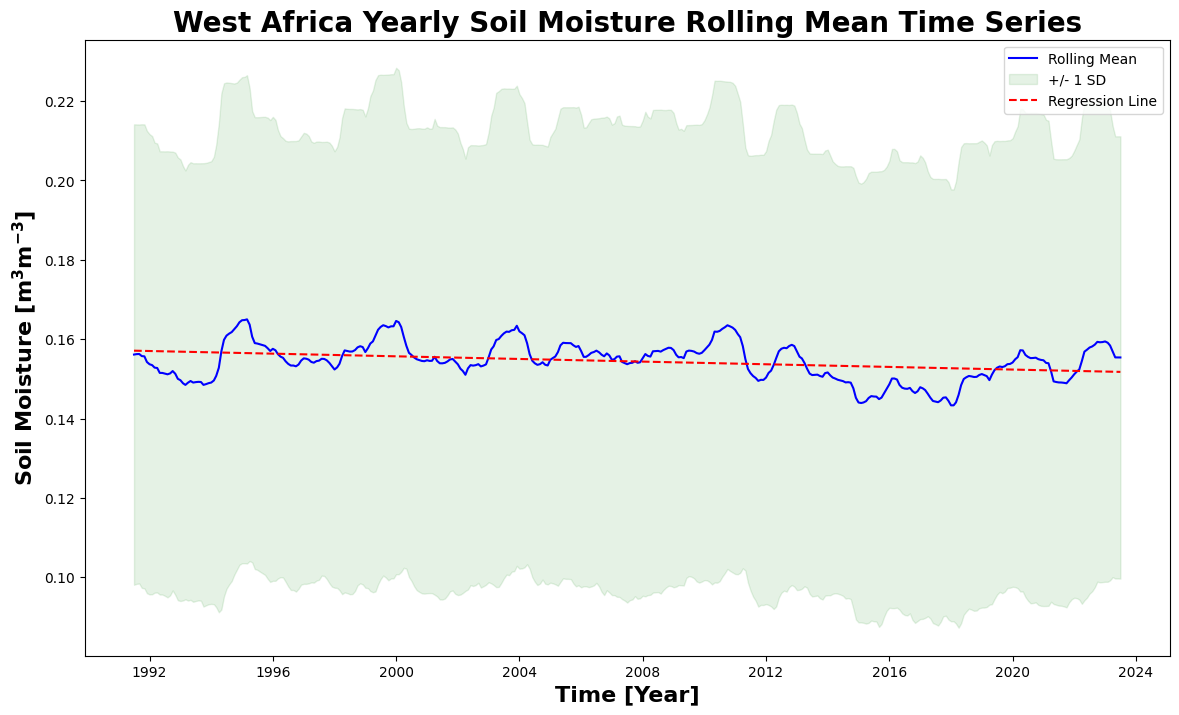

In [6]:

# The dataset
sm = soil.sel(time=slice('1990-01-01', '2023-12-01'))

# Slicing data for West Africa
west_sm = sm.sel(lon=slice(-20, 16), lat=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_sm.lon.values, west_sm.lat.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_sm.sm)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the soil moisture
west_sm['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_sm.lat.values, west_sm.lon.values], dims=['lat', 'lon'])
west_sm['sm_norma'] = west_sm.sm * west_sm.weight_normalized

# Calculate the global values
west_sm_m = west_sm.sm_norma.sum(dim=['lat', 'lon'])

# Calculate the 12-month rolling mean
west_sm_mean_rolling = west_sm_m.rolling(time=12, center=True).mean().dropna('time')

# Calculate standard deviation
std_rr = west_sm_m.rolling(time=12, center=True).std().dropna('time')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(west_sm_mean_rolling.time, west_sm_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_sm_mean_rolling.time, (west_sm_mean_rolling + std_rr), (west_sm_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array([np.datetime64(t).astype(float) for t in west_sm_mean_rolling.time.values])  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_sm_mean_rolling.values, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_sm_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('West Africa Yearly Soil Moisture Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Soil Moisture [$\mathbf{m^3m^{-3}}$]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

plt.show()


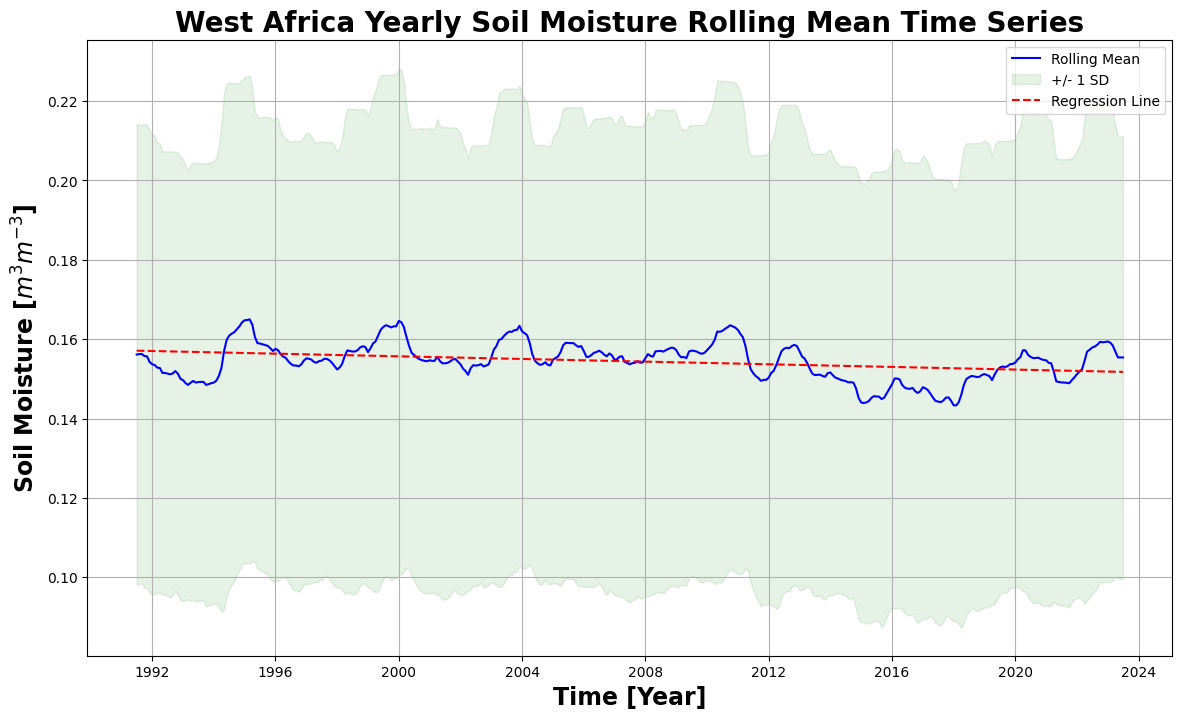

In [5]:

# The dataset
sm = soil.sel(time=slice('1990-01-01', '2023-12-01'))

# Slicing data for West Africa
west_sm = sm.sel(lon=slice(-20, 16), lat=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_sm.lon.values, west_sm.lat.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_sm.sm)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the soil moisture
west_sm['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_sm.lat.values, west_sm.lon.values], dims=['lat', 'lon'])
west_sm['sm_norma'] = west_sm.sm * west_sm.weight_normalized

# Calculate the global values
west_sm_m = west_sm.sm_norma.sum(dim=['lat', 'lon'])

# Calculate the 12-month rolling mean
west_sm_mean_rolling = west_sm_m.rolling(time=12, center=True).mean().dropna('time')

# Calculate standard deviation
std_rr = west_sm_m.rolling(time=12, center=True).std().dropna('time')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(west_sm_mean_rolling.time, west_sm_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_sm_mean_rolling.time, (west_sm_mean_rolling + std_rr), (west_sm_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array([np.datetime64(t).astype(float) for t in west_sm_mean_rolling.time.values])  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_sm_mean_rolling.values, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_sm_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('West Africa Yearly Soil Moisture Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Soil Moisture [$m^3m^{-3}$]", fontsize=17, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=17, fontweight='bold')

plt.legend()

plt.grid()

plt.show()


## Comparing 2022 and 2023 Time Series

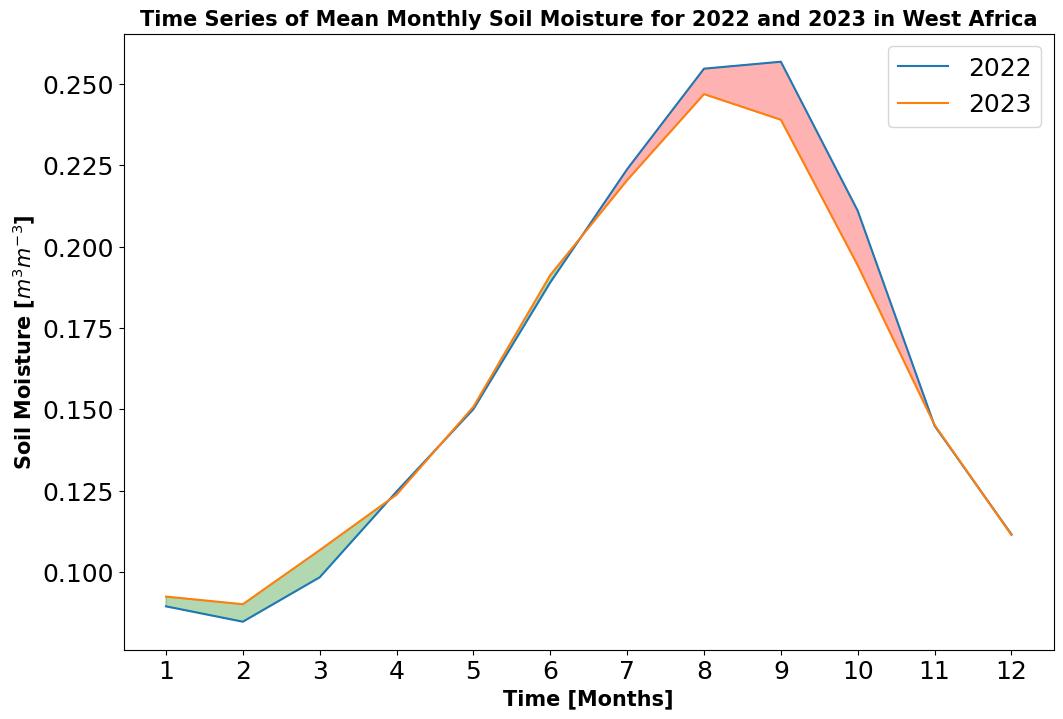

In [32]:
#extracting data for westa frica
west_sm = soil.sel(lon = slice(-20, 16), lat = slice(18, -1))

# 'west_sm' already loaded correctly
weights = np.cos(np.deg2rad(west_sm.lat))
weights.name = "weights"
west_sm_weighted = west_sm.weighted(weights)

# Calculate mean over the region
WestAfrica_sm = west_sm_weighted.mean(["lon", "lat"])

# Select the year 2022 and 2023
WestAfrica_2022 = WestAfrica_sm.sel(time=slice('2022-01-01', '2022-12-31'))
WestAfrica_2023 = WestAfrica_sm.sel(time=slice('2023-01-01', '2023-12-31'))

# Group by month and calculate mean precipitation for each month for both years
WestAfrica_2022_sm = WestAfrica_2022.groupby('time.month').mean()
WestAfrica_2023_sm = WestAfrica_2023.groupby('time.month').mean()

# Extracting precipitation values correctly for both years
moisture_2022 = WestAfrica_2022_sm.sm.values  # Accessing the 'sm' data variable for 2022
moisture_2023 = WestAfrica_2023_sm.sm.values  # Accessing the 'sm' data variable for 2023

# Now, prepare to plot
months = np.arange(1, 13)  # Months from January to December

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(months, moisture_2022, label='2022')  # Plot for 2022
ax.plot(months, moisture_2023, label='2023')  # Plot for 2023
ax.set_title('Time Series of Mean Monthly Soil Moisture for 2022 and 2023 in West Africa', fontweight='bold', fontsize='15')
ax.set_ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize='15')
ax.set_xlabel('Time [Months]', fontweight='bold', fontsize='15')
ax.set_xticks(months)  # Set x-ticks to show each month


# Fill between plots with interpolation
ax.fill_between(months, moisture_2022, moisture_2023, where=(moisture_2023 > moisture_2022), color='green', alpha=0.3, interpolate=True)
ax.fill_between(months, moisture_2022, moisture_2023, where=(moisture_2023 <= moisture_2022), color='red', alpha=0.3, interpolate=True)

ax.legend()  # Add a legend to differentiate the years and conditions

plt.show()


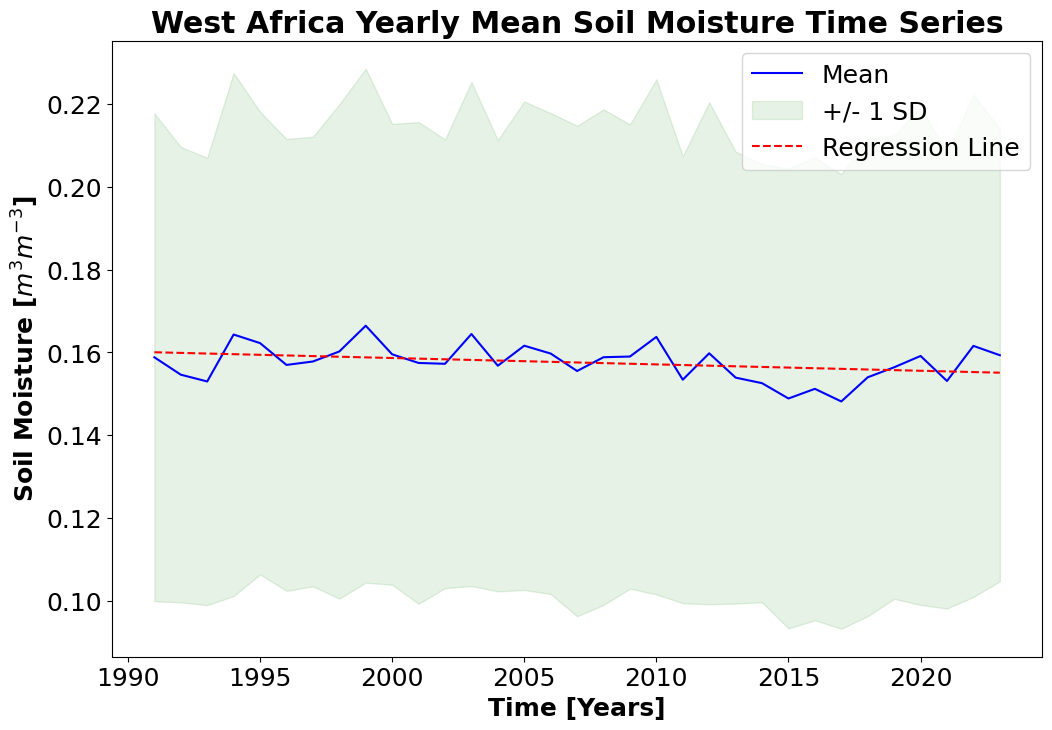

In [33]:
# Calculate yearly mean
sm_yearly1 = sm_mean1.groupby('time.year').mean()

# Calculate standard deviation
std1 = sm_mean1.groupby('time.year').std()

# Prepare data for regression
# Extract years as integer for regression calculation
years = sm_yearly1.year.values
soil_moisture_values = sm_yearly1.values

# Fit a linear regression model
slope, intercept = np.polyfit(years, soil_moisture_values, 1)
# Generate y values based on the slope and intercept
regression_line = slope * years + intercept

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Mean soil moisture plot
ax.plot(sm_yearly1.year, sm_yearly1, color='blue', label='Mean')

# Standard deviation shading
ax.fill_between(sm_yearly1.year, (sm_yearly1 + std1), (sm_yearly1 - std1), alpha=0.1, color='green', label='+/- 1 SD')

# Add regression line
ax.plot(years, regression_line, color='red', linestyle='--', label='Regression Line')

# Plot formatting
plt.title('West Africa Yearly Mean Soil Moisture Time Series', fontweight='bold', fontsize = '17')
plt.ylabel('Soil Moisture [$\mathbf{m^3m^{-3}}$]', fontweight='bold', fontsize = '15')
plt.xlabel('Time [Years]', fontweight='bold', fontsize = '15')
plt.legend()

plt.show()
